### MNIST 분류 모델 만들기 - 신경망

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

In [2]:
import numpy
import sys
import tensorflow as tf

In [4]:
seed = 0
numpy.random.seed(seed)

### 데이터 다운로드

In [5]:
# 처음 다운일 경우, 데이터 다운로드 시간이 걸릴 수 있음. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
import matplotlib.pyplot as plt

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


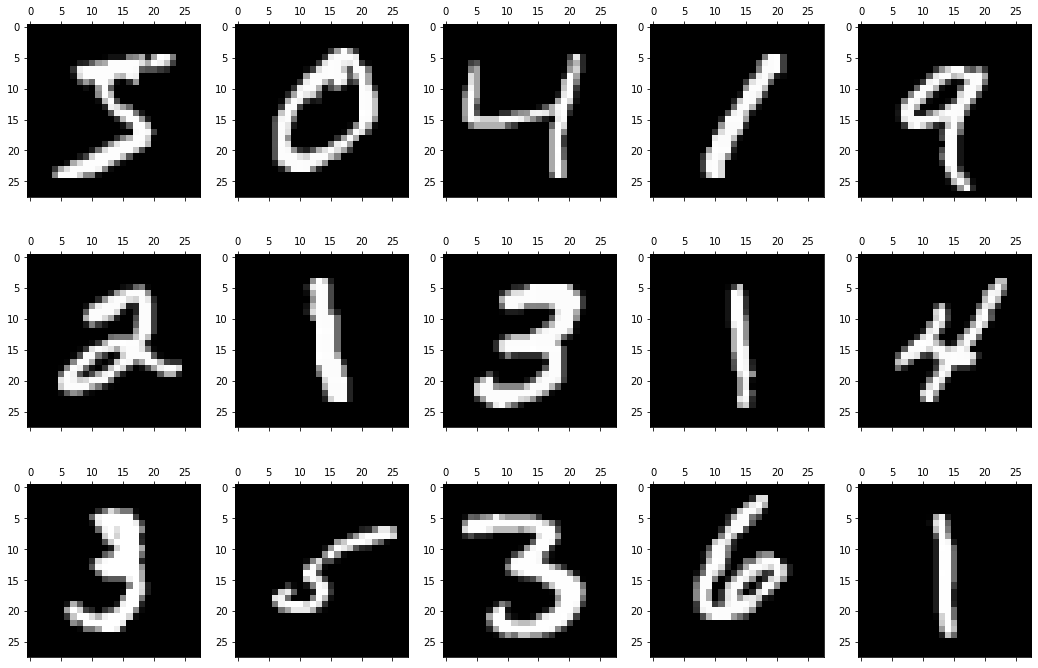

In [7]:
figure,axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18,12)

plt.gray()
print("label={}".format(y_train[0:15]))

col = 0
for row in range(0,3):
    col = row * 5
    axes[row][0].matshow(X_train[col])
    axes[row][1].matshow(X_train[col+1])
    axes[row][2].matshow(X_train[col+2])
    axes[row][3].matshow(X_train[col+3])
    axes[row][4].matshow(X_train[col+4])

### X_train의 데이터 정보를 하나 보기

In [8]:
print(X_train.shape)  # 60000 만개, 28행, 28열
X_train[0].shape

(60000, 28, 28)


(28, 28)

### 신경망에 맞추어 주기 위해 데이터 전처리
 * 학습 데이터 
 * 테스트 데이터

In [9]:
X_train = X_train.reshape(X_train.shape[0],784)   # 60000, 28, 28 -> 60000, 784로 변경
# 데이터 값의 범위 0~255 -> 0~1 
X_train.astype('float64')  
X_train = X_train/255

# 이렇게도 가능
# X_train = X_train.reshape(X_train.shape[0],784).astype('float64') / 255

In [10]:
import numpy as np

In [11]:
print(X_train.shape)               # 데이터 크기
np.min(X_train), np.max(X_train)   # 값의 범위

(60000, 784)


(0.0, 1.0)

In [12]:
# 테스트 데이터 전처리
X_test = X_test.reshape(X_test.shape[0],784)
X_test.astype('float64')
X_test = X_test/255

In [13]:
print(X_test.shape)               # 데이터 크기
np.min(X_test), np.max(X_test)   # 값의 범위

(10000, 784)


(0.0, 1.0)

## 출력데이터 검증을 위해 10진수의 값을 One-Hot Encoding을 수행

In [14]:
# OneHotEncoding - 10진수의 값을 0, 1의 값을 갖는 벡터로 표현
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### 변환 전과 후

In [15]:
y_train[0:4]

array([5, 0, 4, 1], dtype=uint8)

In [16]:
Y_train[0:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### 딥러닝 만들어 보기

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
m = Sequential()

In [19]:
m.add(Dense(512,input_dim=784, activation='relu'))
m.add(Dense(128, activation='relu') )
m.add(Dense(10,activation='softmax'))#softmax

### 오차함수 :categorical_crossentropy, 최적화 함수 : adam

In [20]:
m.compile(loss="categorical_crossentropy", 
         optimizer='adam',
         metrics=['accuracy'])

In [21]:
### 배치 사이즈 200, epochs 30회 실행,
history = m.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                epochs=30,
                batch_size=200,
                verbose=1)

Epoch 1/30
300/300 [==============================] - 1s 5ms/step - loss: 0.2674 - accuracy: 0.9245 - val_loss: 0.1346 - val_accuracy: 0.9585
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0968 - accuracy: 0.9709 - val_loss: 0.0937 - val_accuracy: 0.9706
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0614 - accuracy: 0.9816 - val_loss: 0.0689 - val_accuracy: 0.9780
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0718 - val_accuracy: 0.9781
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0665 - val_accuracy: 0.9814
Epoch 6/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.0638 - val_accuracy: 0.9796
Epoch 7/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 0.0818 - val_accuracy: 0.9771
Epoch 

In [22]:
print("Test Accuracy : %.4f" %(m.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.9847
Test Accuracy : 0.9847


In [23]:
pred = m.predict(X_test)

In [24]:
print( pred.shape )
print( pred[1] )

(10000, 10)
[2.8150371e-18 1.3070420e-12 1.0000000e+00 1.7728102e-17 9.9219194e-30
 1.2918585e-20 2.3182731e-18 6.2873724e-22 6.3510818e-15 9.1639151e-25]
